# 特征提取

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.float_format',lambda x : '%.2f' % x)
plt.rcParams['axes.unicode_minus'] = False
from warnings import filterwarnings
filterwarnings('ignore')

# 扫描样本

In [2]:
df1 = pd.read_csv('./data/500_Person_Gender_Height_Weight_Index.csv')
df1.rename(columns={'Index':"Level"},inplace=True)
df1.sort_values('Height',ascending=True,inplace=True)
df1.reset_index(inplace=True)
plt.style.use({'figure.figsize':(8, 6)})
df1['Ratio'] = df1['Weight']/df1['Height']
df1.sort_values('Ratio',ascending=True,inplace=True)
df1.reset_index(drop=True,inplace=True)
del df1['index']
df1.tail(5)

,Gender,Height,Weight,Level,Ratio
495,Male,148,155,5,1.05
496,Female,146,157,5,1.08
497,Male,140,152,5,1.09
498,Male,145,160,5,1.10
499,Female,142,159,5,1.12


# 正则化

In [3]:
Height_scaled = (df1['Height']-df1['Height'].mean())/(df1['Height'].std())  
Weight_scaled = (df1['Weight']-df1['Weight'].mean())/(df1['Weight'].std())  
df2 = pd.DataFrame()
df2['Gender'] = df1['Gender']
df2['Height_scaled'] = Height_scaled
df2['Weight_scaled'] = Weight_scaled
df2['Height'] = df1['Height']
df2['Weight'] = df1['Weight']
df2['Ratio'] = Weight_scaled/Height_scaled
df2['Multi'] = Weight_scaled*Height_scaled
df2['Level'] = df1['Level']

df2.sort_values('Ratio',ascending=True,inplace=True)
df2 = df2.reset_index(drop=True)
df2.tail(5)

,Gender,Height_scaled,Weight_scaled,Height,Weight,Ratio,Multi,Level
495,Female,0.06,1.42,171,152,22.03,0.09,5
496,Female,0.06,1.51,171,155,23.46,0.10,5
497,Female,-0.06,-1.61,169,54,27.86,0.09,2
498,Male,0.00,0.28,170,115,81.27,0.00,4
499,Female,0.00,1.54,170,156,451.50,0.01,5


# 显示判别曲线

显示数据集散点图 (输入的x需要正则化后的)

显示判别曲线

全部显示

In [4]:
#显示数据集散点图
def plot_dataset(x, y):
    min_x1 = np.min(x[:,0]) -1
    min_x2 = np.min(x[:,1]) -1
    max_x1 = np.max(x[:,0]) +1
    max_x2 = np.max(x[:,1]) +1
    axes = [min_x1, max_x1, min_x2, max_x2]
    plt.plot(x[y==0][:,0], x[y==0][:,1], 'bs')
    plt.plot(x[y==1][:,0], x[y==1][:,1], 'g^')
    plt.grid()
    plt.axis(axes)
#显示判别曲线
def plot_predictions(clf,x):
    min_x1 = np.min(x[:,0]) -1
    min_x2 = np.min(x[:,1]) -1
    max_x1 = np.max(x[:,0]) +1
    max_x2 = np.max(x[:,1]) +1
    axes = [min_x1, max_x1, min_x2, max_x2]
    r = 400
    x0s = np.linspace(axes[0], axes[1] , r)
    x1s = np.linspace(axes[2], axes[3], r)
    x0, x1 = np.meshgrid(x0s, x1s)
    test_x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(test_x)
    y_pred = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
#全部显示
def plot_predict_curve(model,x,y):
    plot_predictions(model,x)
    plot_dataset(x,y)
    plt.show()

# 训练模型，正则化作用

0.992 0.992


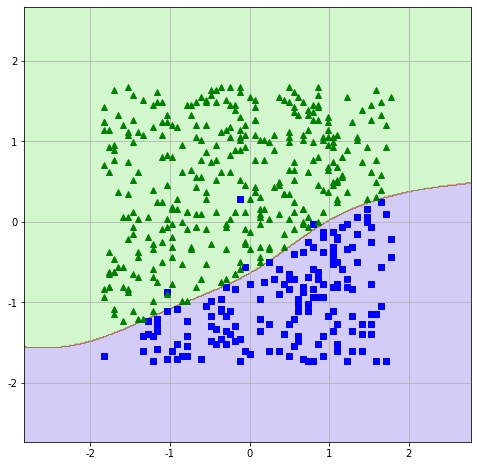

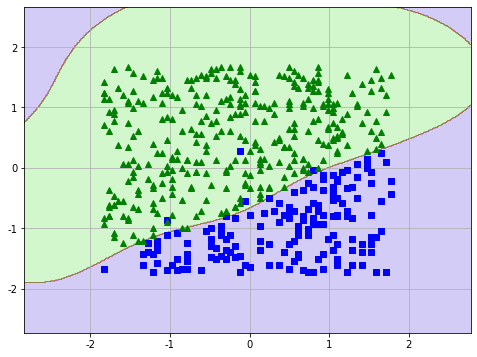

In [5]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, BaggingClassifier  
from sklearn.neural_network import MLPClassifier

df3 = df2
df3['BLevel'] = df3['Level']
df3.BLevel[df3.BLevel<=3] = 0
df3.BLevel[df3.BLevel>3] = 1
plt.figure(figsize=(8,8))

x1=df3['Height_scaled'].tolist()
x2=df3['Weight_scaled'].tolist()
Y = []
X = []
for xx1,xx2,y1 in zip(x1,x2,df3['BLevel'].tolist()):
    X.append([xx1,xx2])
    Y.append(y1)
X = np.array(X)
Y = np.array(Y)

model = SVC(C=5)
model.fit(X,Y)
pre_y = model.predict(X)
accuracy = accuracy_score(Y, pre_y)
print(accuracy,model.score(X,Y))

plot_predict_curve(model,X,Y)

model = SVC(C=50)
model.fit(X,Y)
plot_predict_curve(model,X,Y)